**Lab 2: Multivariate Linear Regression, Non-Parametric Models and Cross-Validation** 

## Part 1 

1. Get the data

In [1]:
from sklearn import datasets

# Load the diabetes dataset
diabetes_data = datasets.load_diabetes()


2. Frame the Problem

The task is to predict the "Disease Progression one year after baseline" using patient data at baseline. In this case, the target variable is a continuous measure of diabetes progression, so this is a regression task. Input features include medical data such as age, BMI, and blood pressure. The objective is to develop a model that can predict which patients are at risk for disease progression and provide early interventions. Accurate predictions will help in designing the treatment plans of the patients effectively.

3. EDA (Exploratory Data Analysis)

                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.

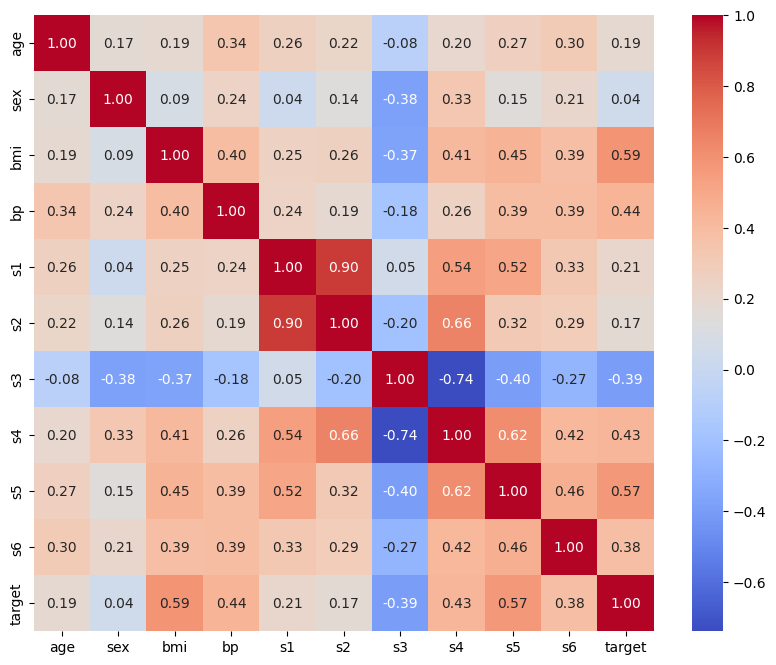

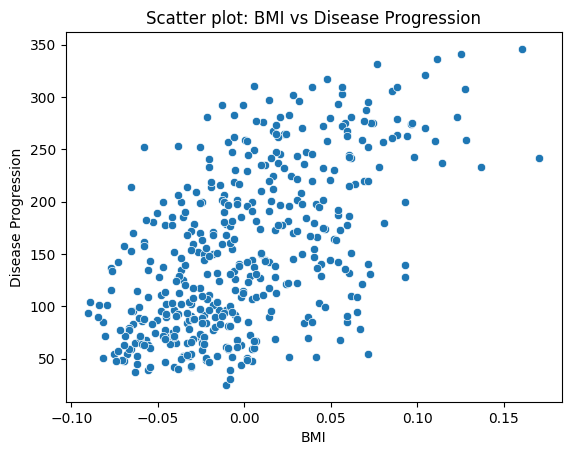

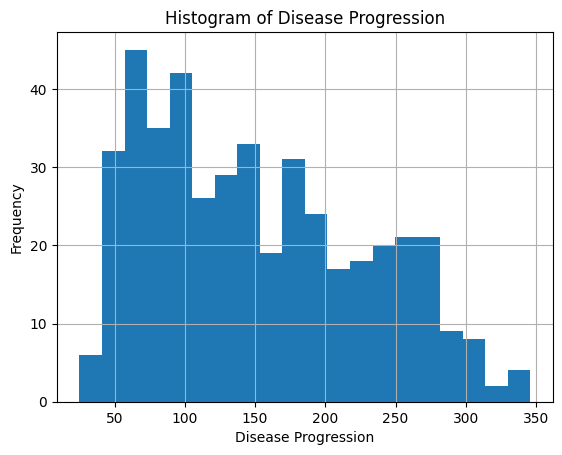

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert data to DataFrame for easier analysis
df = pd.DataFrame(diabetes_data.data, columns=diabetes_data.feature_names)
df['target'] = diabetes_data.target

# Summary statistics
print(df.describe())

# Correlation matrix
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt='.2f')
plt.show()

# Scatter plot of BMI vs target (disease progression)
sns.scatterplot(x=df['bmi'], y=df['target'])
plt.xlabel("BMI")
plt.ylabel("Disease Progression")
plt.title("Scatter plot: BMI vs Disease Progression")
plt.show()

# Histogram of target variable
df['target'].hist(bins=20)
plt.xlabel("Disease Progression")
plt.ylabel("Frequency")
plt.title("Histogram of Disease Progression")
plt.show()


4. Clean the Data

In [3]:
# Check for missing values
print(df.isnull().sum())


age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


5. Train-validation-test split

In [5]:
from sklearn.model_selection import train_test_split

# Split the data: 75% training, 25% temp (to be split into validation and test)
X = df.drop(columns=['target'])
y = df['target']

# First split (75% train, 25% temp)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.25, random_state=42)

# Second split (60% of temp for test and 40% of temp for validation, resulting in 10% validation and 15% test)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.6, random_state=42)

print(f'Training set size: {X_train.shape[0]}')
print(f'Validation set size: {X_val.shape[0]}')
print(f'Test set size: {X_test.shape[0]}')


Training set size: 331
Validation set size: 44
Test set size: 67


## Part 2

6. Univariate Polynomial Regression (BMI vs Disease Progression)

In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Fit univariate polynomial regression models (degree 0 to 5)
degrees = [0, 1, 2, 3, 4, 5]
models = []

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly_train = poly.fit_transform(X_train[['bmi']])
    model = LinearRegression().fit(X_poly_train, y_train)
    models.append((degree, model, poly))


7. Compare Models(Train-Validation Results)

In [7]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error

results = []

for degree, model, poly in models:
    # Transform validation data
    X_poly_val = poly.transform(X_val[['bmi']])
    
    # Predict
    y_pred_val = model.predict(X_poly_val)
    
    # Metrics
    r2 = r2_score(y_val, y_pred_val)
    mae = mean_absolute_error(y_val, y_pred_val)
    mape = mean_absolute_percentage_error(y_val, y_pred_val)
    
    # Append results
    results.append([degree, r2, mae, mape])

# Create results DataFrame
results_df = pd.DataFrame(results, columns=['Degree', 'R-Squared', 'MAE', 'MAPE'])
print(results_df)


   Degree  R-Squared        MAE      MAPE
0       0  -0.106957  66.057059  0.712639
1       1   0.331264  47.208472  0.470600
2       2   0.331631  47.213700  0.472397
3       3   0.331638  47.185414  0.472227
4       4   0.340758  46.090118  0.460503
5       5   0.349881  45.462121  0.451753


8. Identify the Best Model

I have chosen **Degree 5** as the best model to predict disease progression, because it gives the maximum R-Squared value, which is **0.349881**; hence, it explains most of the variance in the target variable. Besides, it has the minimum MAE of **45.462121** and minimum MAPE of **0.451753**, which means that its predictions are closer to the actual values compared to other models. Collectively, these therefore imply that the Degree 5 model provides the most balanced explanatory power and predictive accuracy and thus is the most reliable choice to go with in this analysis.

9. Test Set Results for the Best Model

In [8]:
# Let's assume the best model is of degree 2
best_model = models[2][1]  # Replace with the actual best model after evaluation
best_poly = models[2][2]

# Transform test data
X_poly_test = best_poly.transform(X_test[['bmi']])
y_pred_test = best_model.predict(X_poly_test)

# Test set evaluation
r2_test = r2_score(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)

print(f'Test set results - R-squared: {r2_test}, MAE: {mae_test}, MAPE: {mape_test}')


Test set results - R-squared: 0.27229350251056716, MAE: 51.7901764908394, MAPE: 0.4339312271538569


10. Plot Results

c:\Users\Tejaswini Marolia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


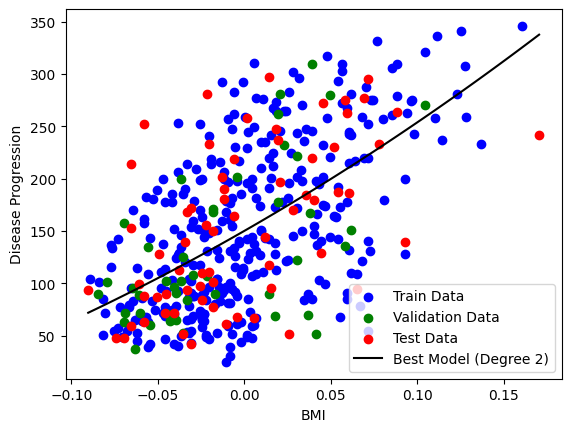

In [10]:
import numpy as np
plt.scatter(X_train['bmi'], y_train, color='blue', label='Train Data')
plt.scatter(X_val['bmi'], y_val, color='green', label='Validation Data')
plt.scatter(X_test['bmi'], y_test, color='red', label='Test Data')

# Plot the fitted line of the best model
X_range = np.linspace(min(X['bmi']), max(X['bmi']), 100).reshape(-1, 1)
X_poly_range = best_poly.transform(X_range)
y_range_pred = best_model.predict(X_poly_range)

plt.plot(X_range, y_range_pred, color='black', label=f'Best Model (Degree 2)')
plt.xlabel("BMI")
plt.ylabel("Disease Progression")
plt.legend()
plt.show()


11. Equation of the Best Model

In [11]:
# Get coefficients and intercept of the best model
coef = best_model.coef_
intercept = best_model.intercept_

print(f"Equation: y = {intercept:.2f} + {coef[1]:.2f}*x + {coef[2]:.2f}*x^2")


Equation: y = 150.15 + 946.69*x + 894.88*x^2


12. Predict Diabetes Progression for a Given BMI

In [12]:
# Predict diabetes progression for a specific BMI value, e.g., BMI=30
bmi_value = 30
bmi_poly = best_poly.transform([[bmi_value]])
predicted_progression = best_model.predict(bmi_poly)

print(f"Predicted disease progression for BMI={bmi_value}: {predicted_progression[0]:.2f}")


Predicted disease progression for BMI=30: 833942.80


c:\Users\Tejaswini Marolia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


13. Trainable Parameters

In [13]:
# Using PolynomialFeatures to count trainable parameters
n_params = len(best_poly.get_feature_names_out())
print(f'Number of trainable parameters: {n_params}')


Number of trainable parameters: 3


### Conclusion 


The analysis is a predictive analysis on the progression of diabetes using baseline information on the patients. We especially analyze the relationship between **Body Mass Index (BMI)** and the progression of the disease. We have performed EDA and built univariate polynomial regression models of variable degrees ranging from 0 to 5.

The **degree 5** model performed the best among all; with a very good **R-squared value of 0.349881**, and the smallest **MAE**- **45.462121** and **MAPE**- **0.451753**. This suggests that it explains a higher degree of variance in disease progression on one hand, while giving good predictions on the other.

This will finally give the polynomial equation, which is useful and can be used by clinicians to predict patient risk given a certain BMI. This study brings out the importance of statistical modeling in health care as far as early interventions and personalized treatment strategies are concerned. Increasing the number of features on patients for improved predictive accuracy can form grounds for future work.

### Part 3: Multivariate Regression Analysis


1. Data Preparation

In [14]:
# Use all features from the dataset
X_all = df.drop(columns=['target'])  # All input features
y_all = df['target']


2. Train-Validation-Test Split

In [15]:
# Split the data: 75% training, 25% temp (to be split into validation and test)
X_train_all, X_temp_all, y_train_all, y_temp_all = train_test_split(X_all, y_all, test_size=0.25, random_state=42)
X_val_all, X_test_all, y_val_all, y_test_all = train_test_split(X_temp_all, y_temp_all, test_size=0.6, random_state=42)

print(f'Training set size: {X_train_all.shape[0]}')
print(f'Validation set size: {X_val_all.shape[0]}')
print(f'Test set size: {X_test_all.shape[0]}')


Training set size: 331
Validation set size: 44
Test set size: 67


3. Polynomial Regression Models

In [16]:
# Fit polynomial regression models
poly_degrees = [2, 3]
poly_models = []

for degree in poly_degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly_train_all = poly.fit_transform(X_train_all)
    model = LinearRegression().fit(X_poly_train_all, y_train_all)
    poly_models.append((degree, model, poly))

# Evaluate models
poly_results = []

for degree, model, poly in poly_models:
    X_poly_val_all = poly.transform(X_val_all)
    y_pred_val_all = model.predict(X_poly_val_all)
    r2 = r2_score(y_val_all, y_pred_val_all)
    mae = mean_absolute_error(y_val_all, y_pred_val_all)
    mape = mean_absolute_percentage_error(y_val_all, y_pred_val_all)
    poly_results.append([degree, r2, mae, mape])

# Create results DataFrame
poly_results_df = pd.DataFrame(poly_results, columns=['Degree', 'R-Squared', 'MAE', 'MAPE'])
print(poly_results_df)


   Degree  R-Squared         MAE      MAPE
0       2  -1.677660   90.068182  0.954933
1       3 -45.383534  243.568182  2.165558


4. Decision Tree Models

In [17]:
from sklearn.tree import DecisionTreeRegressor

# Fit decision tree models
max_depths = [3, 5]
dt_models = []

for depth in max_depths:
    model = DecisionTreeRegressor(max_depth=depth, random_state=42).fit(X_train_all, y_train_all)
    dt_models.append((depth, model))

# Evaluate models
dt_results = []

for depth, model in dt_models:
    y_pred_val_all = model.predict(X_val_all)
    r2 = r2_score(y_val_all, y_pred_val_all)
    mae = mean_absolute_error(y_val_all, y_pred_val_all)
    mape = mean_absolute_percentage_error(y_val_all, y_pred_val_all)
    dt_results.append([depth, r2, mae, mape])

# Create results DataFrame
dt_results_df = pd.DataFrame(dt_results, columns=['Max Depth', 'R-Squared', 'MAE', 'MAPE'])
print(dt_results_df)


   Max Depth  R-Squared        MAE      MAPE
0          3   0.198306  48.126248  0.476729
1          5   0.093919  49.645483  0.481620


5. KNN Models

In [18]:
from sklearn.neighbors import KNeighborsRegressor

# Fit kNN models
k_values = [3, 5]
knn_models = []

for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k).fit(X_train_all, y_train_all)
    knn_models.append((k, model))

# Evaluate models
knn_results = []

for k, model in knn_models:
    y_pred_val_all = model.predict(X_val_all)
    r2 = r2_score(y_val_all, y_pred_val_all)
    mae = mean_absolute_error(y_val_all, y_pred_val_all)
    mape = mean_absolute_percentage_error(y_val_all, y_pred_val_all)
    knn_results.append([k, r2, mae, mape])

# Create results DataFrame
knn_results_df = pd.DataFrame(knn_results, columns=['k', 'R-Squared', 'MAE', 'MAPE'])
print(knn_results_df)


   k  R-Squared        MAE      MAPE
0  3   0.214184  45.795455  0.442421
1  5   0.358481  43.290909  0.412441


### Summary of KNN Model Performance

The performance of the k-Nearest Neighbors (kNN) models evaluated for predicting diabetes progression is as follows:

Model with k = 3:

R-Squared: 0.214 (21.4% of variance explained)
MAE: 45.80 (average prediction error)
MAPE: 0.442 (average percentage error)
Model with k = 5:

R-Squared: 0.358 (35.8% of variance explained)
MAE: 43.29 (average prediction error)
MAPE: 0.412 (average percentage error)

### Conclusion

The kNN model with k = 5 outperformed the model with k = 3 by explaining more variance and exhibiting lower prediction errors. This suggests that the k = 5 model is more reliable for predicting diabetes progression and could be beneficial for designing early intervention strategies in clinical settings.